In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import os


In [2]:
directory = os.getenv('HOME') + '/aiffel/aiffelthon/'

In [3]:
data_test = pd.read_pickle(directory + 'data_test_spm_4000_0317.pkl','gzip')
data_train = pd.read_pickle(directory + 'data_train_spm_4000_0317.pkl','gzip')

In [4]:
from konlpy.tag import Mecab
mecab = Mecab()

In [5]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340262 entries, 0 to 1340261
Data columns (total 8 columns):
 #   Column    Non-Null Count    Dtype 
---  ------    --------------    ----- 
 0   reg       1340262 non-null  object
 1   topic     1340262 non-null  object
 2   eng       1340262 non-null  object
 3   dial      1340262 non-null  object
 4   tok_len   1340262 non-null  int64 
 5   tok_cat   1340262 non-null  int64 
 6   toks_en   1340262 non-null  object
 7   toks_dec  1340262 non-null  object
dtypes: int64(2), object(6)
memory usage: 81.8+ MB


In [6]:
data_train.head()

,reg,topic,eng,dial,tok_len,tok_cat,toks_en,toks_dec
0,jd,역사,<jd> I've changed my mind a little bit.,생각이 쪼금씩 바뀌드라고,10,1,"[3981, 5, 3981, 3, 46, 854, 94, 810, 11, 79, 1...","[1, 796, 177, 2655, 2831, 107, 3353, 293, 2448..."
1,jd,가족,<jd> You know what? Foreigners still get used ...,웜마 알겄는가 애국인들이 그또 달 적응하고,17,1,"[3981, 5, 3981, 3, 14, 141, 106, 4005, 3981, 3...","[1, 733, 37, 2765, 1673, 130, 2675, 2477, 89, ..."
2,jd,건강,"<jd> All of a sudden, I think I've ripped off ...",아으 갑자기 에전에 맹장 뜯은 게잉 생각난디야.,22,1,"[3981, 5, 3981, 3, 48, 56, 11, 796, 3, 3981, 3...","[1, 11, 2488, 1667, 280, 763, 856, 2542, 2448,..."
3,jd,스타일,<jd> I have a lot of ideas about getting older...,보먼은 좀 품위 있게 나이 들어가야 되겠단 싱각을 참 마이 해요잉.,18,1,"[3981, 5, 3981, 3, 104, 11, 155, 56, 2402, 67,...","[1, 1545, 44, 2448, 2911, 2736, 15, 2461, 361,..."
4,jd,먹거리,"<jd> It's a little bit of a tastey, but still...",약깐 좀 약깐 맛이가 쪼까 머시기 카긴 한디 그또,18,1,"[3981, 5, 3981, 3, 3983, 3, 3988, 11, 79, 138,...","[1, 155, 44, 155, 239, 141, 897, 1053, 2463, 8..."


In [7]:
data_train.describe()

,tok_len,tok_cat
count,1.340262e+06,1.340262e+06
mean,3.743432e+01,1.971635e+00
std,4.656963e+01,2.049738e+00
min,1.000000e+00,1.000000e+00
25%,1.200000e+01,1.000000e+00
50%,1.900000e+01,1.000000e+00
75%,3.700000e+01,2.000000e+00
max,3.960000e+02,1.300000e+01


In [8]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   reg       1500 non-null   object
 1   topic     1500 non-null   object
 2   eng       1500 non-null   object
 3   dial      1500 non-null   object
 4   tok_len   1500 non-null   int64 
 5   tok_cat   1500 non-null   int64 
 6   toks_en   1500 non-null   object
 7   toks_dec  1500 non-null   object
dtypes: int64(2), object(6)
memory usage: 93.9+ KB


In [9]:
data_test.describe()

,tok_len,tok_cat
count,1500.000000,1500.000000
mean,93.140667,4.461333
std,80.551465,3.584746
min,4.000000,1.000000
25%,21.000000,1.000000
50%,67.500000,3.000000
75%,153.250000,7.000000
max,323.000000,13.000000


In [10]:
def sen_len(corpus, kor=False) :
    max_len = 0
    min_len = 999
    cum_len = 0
    max_content = ''
    min_content = ''
    for i in corpus :
        if kor : 
            i = i[0]
        length = len(i)
        if length >= max_len : 
            max_len = length
            max_content = i
        if length <= min_len : 
            min_len = length
            min_content = i
        cum_len += length
    
    print(f'max_len : {max_len}')
    print('max_content :', max_content)
    print(f'min_len : {min_len}')
    print('min_content :', min_content)
    print(f'average_len : {round(cum_len/len(corpus),1)}')
    
    return max_len, min_len, cum_len

In [11]:
def plot_seq_dist(corpus,kor=False) :
    max_len, min_len , _ = sen_len(corpus,kor)
    seq_len_matrix = np.zeros((max_len+1), dtype=int)
    for i in corpus :
        if kor :
            i = i[0]
        length = len(i)
        seq_len_matrix[length] += 1
    
    fig,ax = plt.subplots()
    hist = ax.bar(range(len(seq_len_matrix)),seq_len_matrix)
    plt.title('seq_distribution')
    plt.show()

In [12]:
dial = data_train.dial.values

max_len : 650
max_content : 근꼬 아 뭐~ 예 정도느 뭐~ 괘안아 내 뭐~ 예 정도까지느 내나 인생 수업한 꺼꼬 경제 수업한 끼라꼬 생각해.  증말 아깝대이 이른 꺼 쓸데없이 이른 꺼를 랑 하꼬 고런 생각 드는데 그기 예산이 또 느무 남아도 알았느 된대이 가주꼬 뭐~  지느 주로 구매하느 기 지가 쫌 화장품에 관심이 많아가 화장품이라던지를 아이머 바디용품을 쫌 마이 사느 편인디  그서 쫌 뭐~ 우짤 수 없은 상황이꼬 당연히 약깐 복지를 국가들을 따라가야 된다느 건 맞지마  컴퓨터에 쫌 관심이 많았었는데 고런 식으로 가격대를 또 부대이 보믄은 아 요거를 또 굳이 사야 되노 이른 식으로 생각을 마이 카느 꺼 같애예 이기 또 가격이나 금액대가 있으먼은  지느 쪼깨 약깐 즈그 남편도 부에 관련된 책을 자꼬 읽어보래이 얘기를 카거든예 니 관념을 쫌 바까야 된대이.  보믄 머 니가 좋아하느 그륵이라든둥 이른 디느 쫌 욕심을 부려서 그렇지를.  약깐 쫌 안타까운 꺼 긋해 주 꺼머 고로 주던가 아니믄은 주질 말든가  쫌 학원비가 쫌 비싸께 들어가예 짐  그리 꼬 옷을 먼저 사가 입어보느 데라가 똔을 또 그마이 또 투자를 칼 수 있대이 생각하거든.  부모님한테 더 돌라꼬 카꼬 고런 경우가 쫌 자주 있더라고예.  쓸 데 쫌 씨꼬 여러 간대이 고로 경험도 마이 카꼬 이른 데 똔을 마이 쓰시꼬 
min_len : 2
min_content : 도 
average_len : 64.3


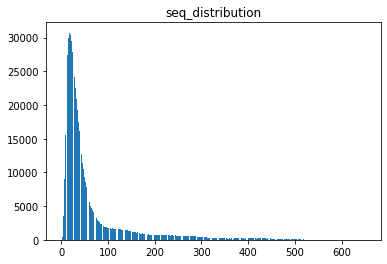

In [13]:
plot_seq_dist(dial)

In [14]:
from transformers import pipeline

In [15]:
data_train['ko_len']  = data_train['dial'].apply(lambda x : len(x.split()))

In [16]:
data_train['ko_len'].mean()

17.351212673342975

In [17]:
data_train.groupby('reg')[['ko_len']].agg(['mean','std','max','min'])

ko_len                    
          mean        std  max min
reg                               
cc   23.645900  29.615938  187   1
gs   22.172536  27.710436  185   1
jd   20.305586  25.394581  180   1
jj   14.768498  18.201267  129   1
kw   13.952882  17.072043  153   1

In [18]:
data_train['token_dial'] = data_train['dial'].apply(mecab.morphs)
data_train['token_dial_len'] = data_train['token_dial'].apply(len)

In [19]:
print("사투리 문맥 길이:",data_train['token_dial_len'].mean())

사투리 문맥 길이: 33.01575139786102


In [20]:
data_train.groupby(by=['reg'])[['token_dial_len']].agg(['mean','max','min'])

token_dial_len         
              mean  max min
reg                        
cc       41.902146  334   1
gs       40.890902  329   1
jd       37.328074  328   1
jj       28.522399  242   1
kw       28.305532  280   1

In [21]:
from wordcloud import WordCloud
import matplotlib as mpl
import matplotlib.font_manager as fm

In [22]:
from collections import Counter

In [23]:
counter = Counter()
for i in data_train.token_dial :
    counter.update(i)
counter.most_common(30)

[('이', 1696238),
 ('.', 1244924),
 ('가', 879735),
 ('는', 780776),
 ('하', 584246),
 ('게', 560331),
 ('고', 528576),
 ('을', 485333),
 ('어', 470998),
 ('거', 464850),
 ('?', 464280),
 ('에', 444899),
 ('도', 435993),
 ('은', 412780),
 ('있', 410805),
 ('지', 404022),
 ('나', 396054),
 ('쫌', 360430),
 ('그', 356773),
 ('구', 355267),
 ('~', 348326),
 ('를', 325656),
 ('아', 322625),
 ('꼬', 309606),
 ('느', 289398),
 ('들', 287596),
 ('내', 262223),
 ('다', 238730),
 ('기', 232866),
 ('잉', 229252)]

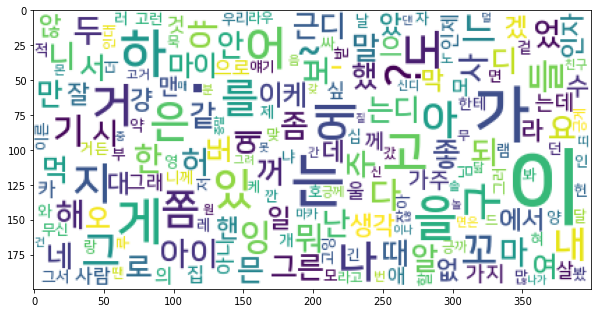

In [24]:
# font path http://corazzon.github.io/matplotlib_font_setting
font_list = [(f.name, f.fname) for f in fm.fontManager.ttflist if 'Nanum' in f.name]
font_list[0][1]
wc = WordCloud(font_path= font_list[0][1], background_color='white',max_font_size=60)
cloud = wc.generate_from_frequencies(counter)
fig = plt.figure(figsize =(10,10))
plt.imshow(cloud)
plt.show()

In [25]:
regs = ['kw','jj','cc','gs','jd']

kw
[('.', 759012), ('이', 445739), ('?', 271358), ('는', 262424), ('가', 261236), ('하', 247318), ('지', 184954), ('어', 172929), ('에', 163346), ('두', 148034), ('나', 144024), ('고', 141474), ('그', 138605), ('을', 137193), ('있', 136589), ('사', 129995), ('구', 127022), ('게', 124880), ('내', 113547), ('아', 110811), ('다', 109758), ('은', 109267), ('거', 102828), ('야', 100210), ('기', 92524), ('를', 91204), ('들', 73137), ('마', 70410), ('니', 68560), ('아이', 66483)]

jj
[('이', 490977), ('게', 277762), ('거', 220824), ('.', 156676), ('도', 140964), ('는', 138884), ('난', 106952), ('가', 106848), ('?', 100946), ('나', 94653), ('고', 89579), ('어', 88925), ('아', 81224), ('아이', 78522), ('하', 77933), ('에', 73652), ('요', 63772), ('은', 62525), ('주', 58355), ('허', 57713), ('해', 56293), ('잘', 56277), ('막', 55724), ('네', 54037), ('라', 50912), ('예', 48150), ('영', 47470), ('맨', 46145), ('한', 46000), ('지', 45416)]

cc
[('이', 216444), ('구', 196848), ('는', 189595), ('가', 141674), ('쫌', 126845), ('을', 112317), ('.', 100534), ('은', 

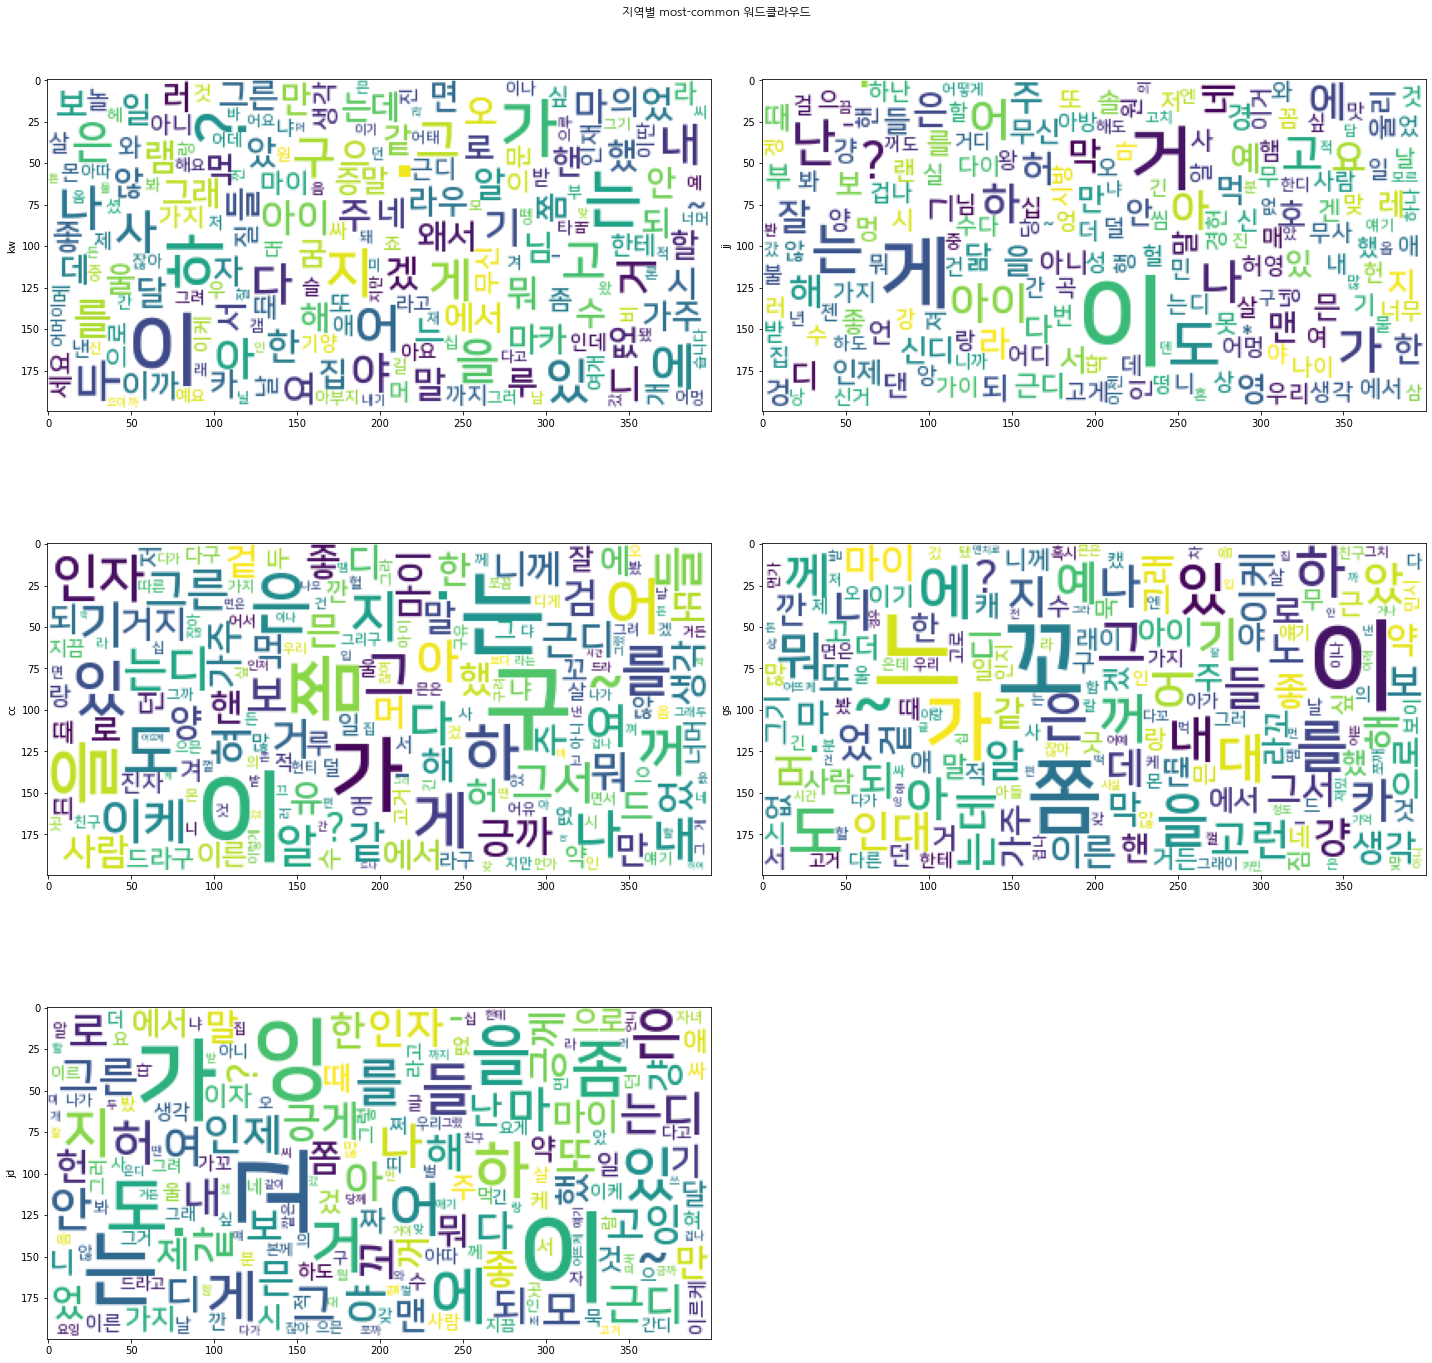

In [26]:
plt.figure(figsize= (20,20))

for i, reg in enumerate(regs) :
    counter = Counter()
    for k in data_train.loc[data_train['reg'] == reg].token_dial :
        counter.update(k)
    
    print(reg)
    print(counter.most_common(30),end='\n\n')

    # font path http://corazzon.github.io/matplotlib_font_setting
    font_list = [(f.name, f.fname) for f in fm.fontManager.ttflist if 'Nanum' in f.name]
    font_list[0][1]
    wc = WordCloud(font_path= font_list[0][1], background_color='white',max_font_size=60)
    
    
    cloud = wc.generate_from_frequencies(counter)
    
    plt.subplot(3,2,i+1)
    plt.ylabel(reg)
    plt.imshow(cloud)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)

plt.suptitle('지역별 most-common 워드클라우드',  font ='NanumGothic')
plt.tight_layout()
plt.show()

In [27]:
import nltk
# nltk.download('punkt') # just for example
from nltk import ngrams
# from nltk.tokenize import word_tokenize # just for example
import seaborn as sns

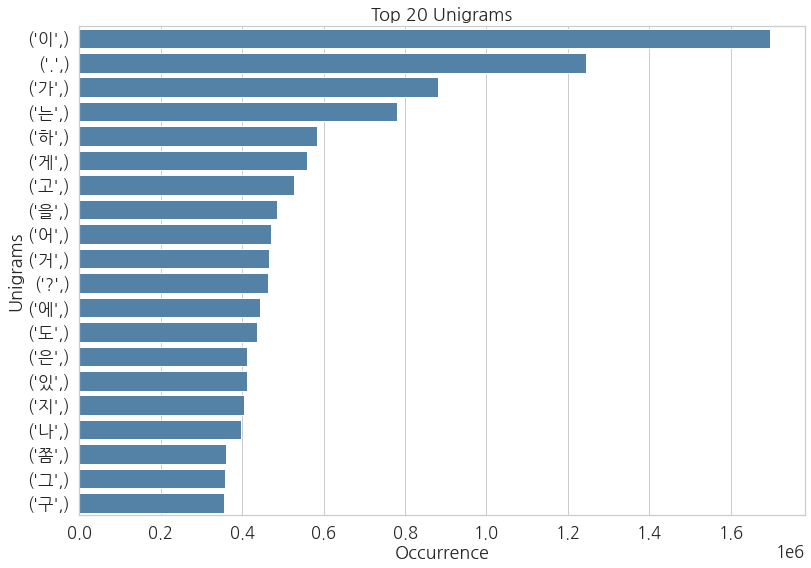

In [28]:
frequency_pos = Counter()
for i in data_train['token_dial'] :
    token_words = ngrams(i,1) #change n-grams
    frequency_pos.update(token_words)
    
data_train_pos = pd.DataFrame(frequency_pos.most_common(20))

plt.rcParams['figure.figsize'] = [13,9]

# Barplot that shows the top most common
sns.set(font_scale = 1.5, style = 'whitegrid', font ='NanumGothic')

sns_pos_1 = sns.barplot(x = data_train_pos[1], y = data_train_pos[0], color = 'steelblue')

# Setting axes labels
sns_pos_1.set(xlabel = 'Occurrence', ylabel = 'Unigrams', title = 'Top 20 Unigrams');

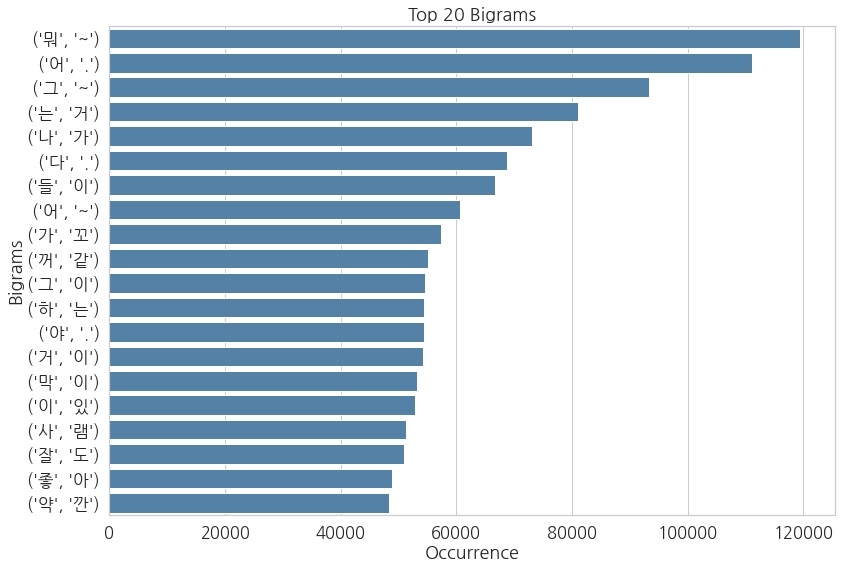

In [29]:
frequency_pos = Counter()
for i in data_train['token_dial'] :
    token_words = ngrams(i,2)
    frequency_pos.update(token_words)
    
data_train_pos = pd.DataFrame(frequency_pos.most_common(20))

# Barplot that shows the top most common
sns.set(font_scale = 1.5, style = 'whitegrid', font ='NanumGothic')

sns_pos_1 = sns.barplot(x = data_train_pos[1], y = data_train_pos[0], color = 'steelblue')

# Setting axes labels
sns_pos_1.set(xlabel = 'Occurrence', ylabel = 'Bigrams', title = 'Top 20 Bigrams');

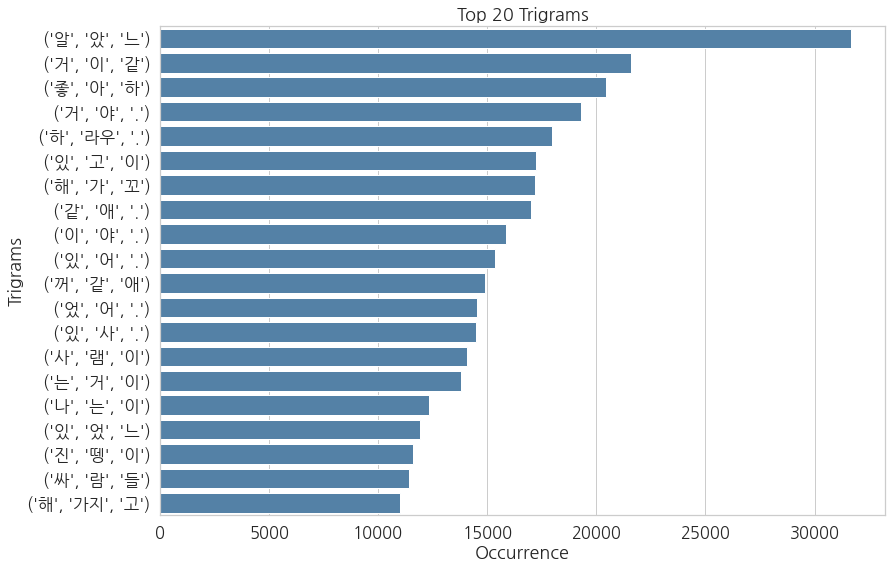

In [30]:
frequency_pos = Counter()
for i in data_train['token_dial'] :
    token_words = ngrams(i,3)
    frequency_pos.update(token_words)
    
data_train_pos = pd.DataFrame(frequency_pos.most_common(20))

# Barplot that shows the top most common
sns.set(font_scale = 1.5, style = 'whitegrid', font ='NanumGothic')

sns_pos_1 = sns.barplot(x = data_train_pos[1], y = data_train_pos[0], color = 'steelblue')

# Setting axes labels
sns_pos_1.set(xlabel = 'Occurrence', ylabel = 'Trigrams', title = 'Top 20 Trigrams');

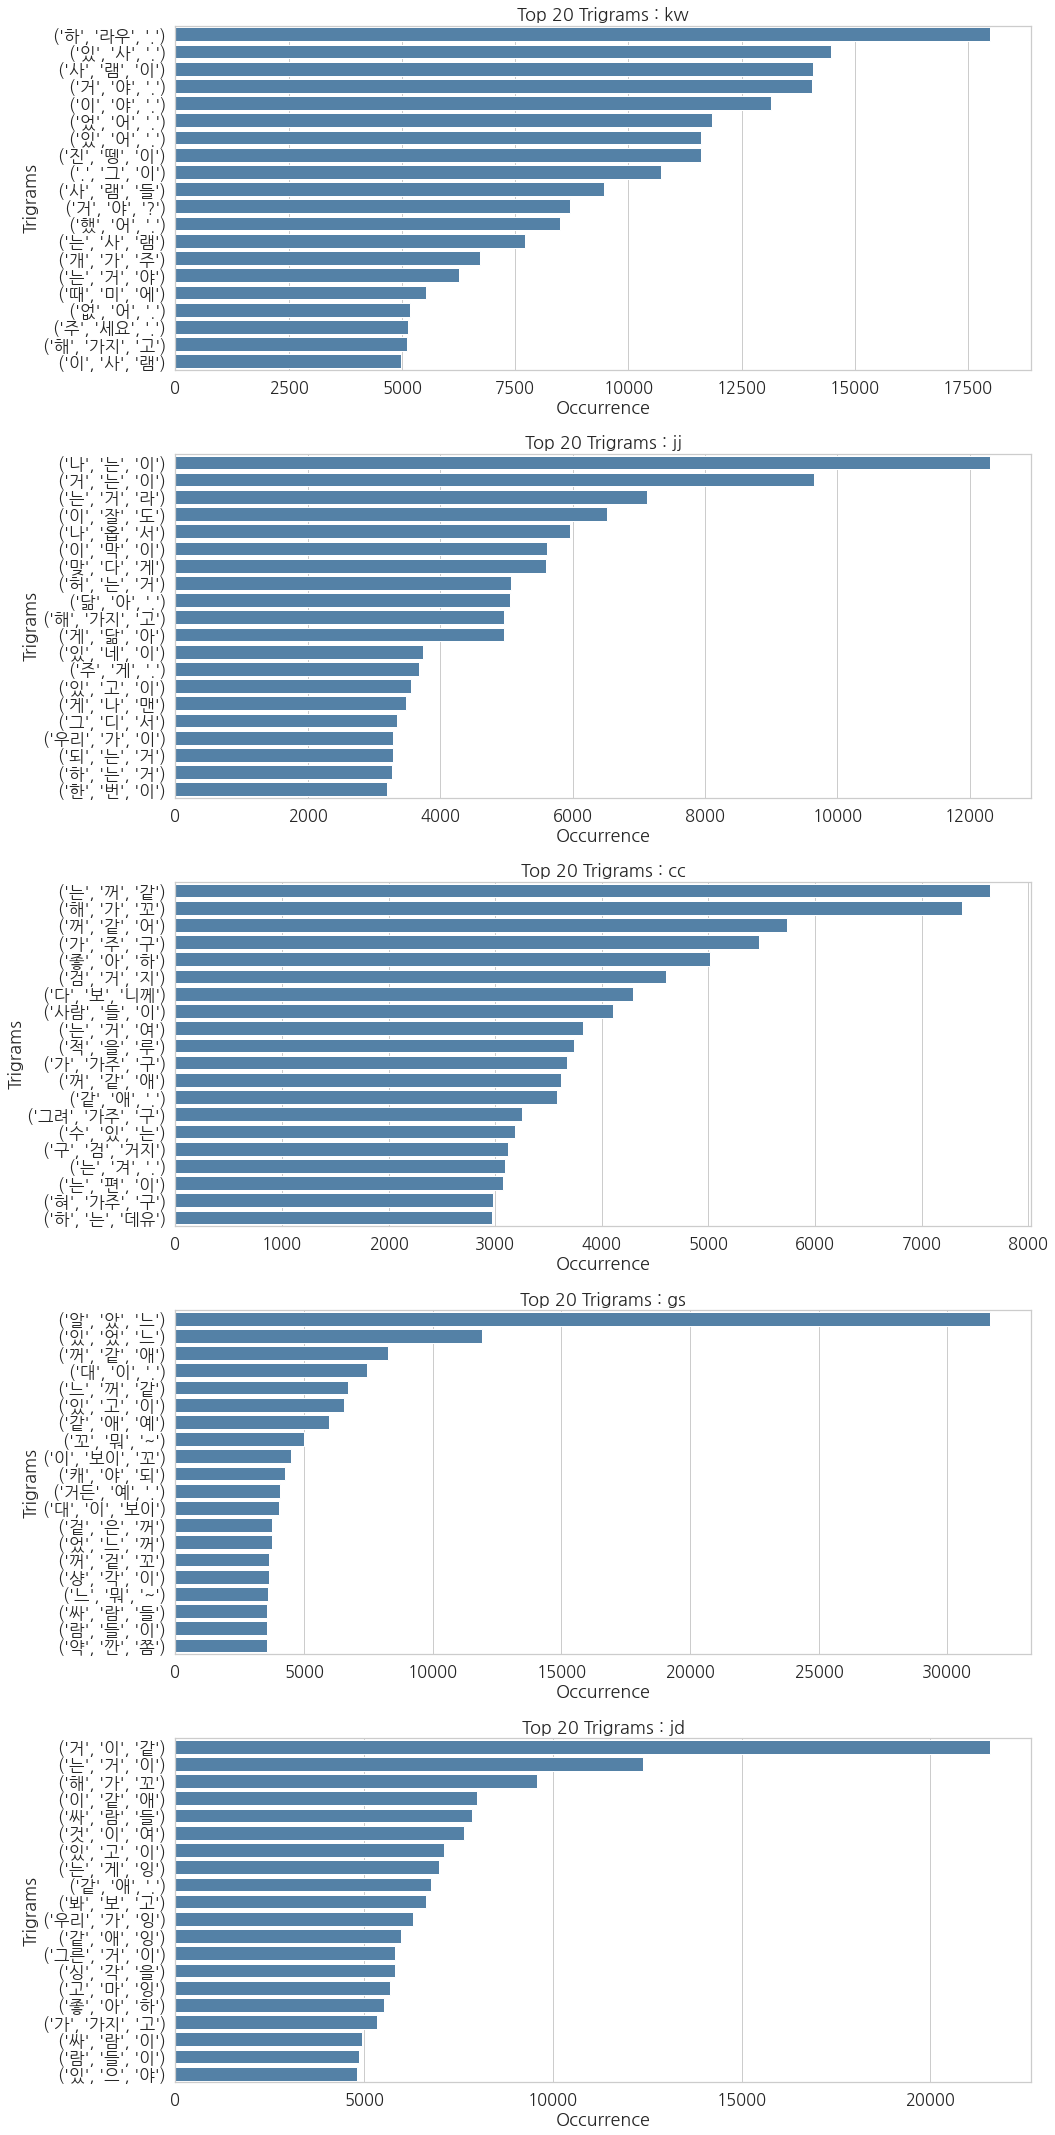

In [31]:
fig = plt.figure(figsize=(15,30))

for i, reg in enumerate(regs) :
    
    frequency_pos = Counter()
    
    for k in data_train.loc[data_train['reg'] == reg, 'token_dial'] :
        token_words = ngrams(k,3)
        frequency_pos.update(token_words)

    data_train_pos = pd.DataFrame(frequency_pos.most_common(20))

    # Barplot that shows the top most common
    
    plt.subplot(5,1,i+1)
    sns.set(font_scale = 1.5, style = 'whitegrid', font ='NanumGothic')
    sns_pos_1 = sns.barplot(x = data_train_pos[1], y = data_train_pos[0], color = 'steelblue')

    # Setting axes labels
    sns_pos_1.set(xlabel = 'Occurrence', ylabel = 'Trigrams', title = f'Top 20 Trigrams : {reg}')
#     plt.xticks(fontsize=16)
#     plt.yticks(fontsize=16)

    
plt.tight_layout()
plt.show()

In [32]:
#명사 카운트
reg_dic = dict()
for reg in regs :
    noun_counter = Counter()
    eomi_counter = Counter()
    sentences_tag = []

    for i in data_train.loc[data_train['reg'] == reg ,'dial'].sample(frac=1)[:100000] :
        sentences_tag.extend(mecab.pos(i))

    for word, tag in sentences_tag:
        if tag in ['NNG']: 
            noun_counter.update([word])

        if tag in ['EC'] :
            eomi_counter.update([word])
            
    reg_dic[reg] = {'noun_count' : noun_counter, 'eomi_count' : eomi_counter}

In [33]:
for reg in regs :
    print(reg)
    print('noun')
    print(reg_dic[reg]['noun_count'].most_common(20))
    print('eomi')
    print(reg_dic[reg]['eomi_count'].most_common(20))
    print()

kw
noun
[('램', 10495), ('말', 9746), ('아이', 9081), ('기', 5726), ('집', 5306), ('일', 4882), ('사', 4842), ('달', 4719), ('때', 4636), ('생각', 4288), ('날', 3894), ('인재', 3772), ('개', 3395), ('여개', 3144), ('질', 2889), ('어머이', 2770), ('아부지', 2684), ('어멍', 2467), ('애', 2257), ('겨', 2206)]
eomi
[('고', 26263), ('구', 22460), ('게', 11820), ('지', 10872), ('어', 9375), ('아', 7089), ('는데', 5764), ('사', 5486), ('면', 5229), ('나', 4884), ('다', 4881), ('으문', 4752), ('이까', 4184), ('라우', 3906), ('머', 3108), ('라', 2957), ('서', 2620), ('다고', 2130), ('믄', 2125), ('야', 2104)]

jj
noun
[('막', 17771), ('아이', 16450), ('디', 13408), ('때', 11430), ('말', 7826), ('솔', 6908), ('게', 6464), ('나이', 5764), ('사람', 5764), ('댄', 5210), ('경', 5033), ('다이', 4861), ('집', 4681), ('예', 4650), ('행', 4138), ('영', 4031), ('어멍', 4020), ('가이', 4019), ('강', 4016), ('허영', 3970)]
eomi
[('게', 45298), ('고', 25352), ('어', 12812), ('믄', 11039), ('아', 10468), ('라', 6788), ('지', 6538), ('맨', 6180), ('멍', 5972), ('서', 5891), ('는디', 4735), ('엉', 4700

### sentencepiece

In [34]:
import sentencepiece as spm
def generate_tokenizer(corpus, vocab_size, lang="en", pad_id=0, bos_id=1, eos_id=2, unk_id=3):

    temp_file = os.getenv('HOME') + f'/aiffel/aiffelthon/spm/corpus_{lang}.txt'     # corpus를 받아 txt파일로 저장
    
    with open(temp_file, 'w') as f:
        for row in corpus:
            f.write(str(row) + '\n')
    
    # Sentencepiece를 이용해 
    spm.SentencePieceTrainer.Train(
        f'--input={temp_file} --model_type=bpe --pad_id={pad_id} --bos_id={bos_id} --eos_id={eos_id} \
        --unk_id={unk_id} --model_prefix=spm_{lang}_r1 --vocab_size={vocab_size} \
        --user_defined_symbols=<jj>,<jd>,<gs>,<cc>,<kw>,@이름,@상호 --remove_extra_whitespaces=false'   # model_r1
    )
    
    tokenizer = spm.SentencePieceProcessor()
    tokenizer.Load(f'spm_{lang}_r1.model') # model_r1

    return tokenizer

In [35]:
spm_corpus = data_train.loc[data_train['reg'] == regs[0]].sample(frac=1).copy()[:100000]

for reg in regs[1:] :
    temp_corpus = data_train.loc[data_train['reg'] == reg].copy()[:100000]
    spm_corpus = pd.concat([spm_corpus,temp_corpus],axis=0)
len(spm_corpus)

500000

In [36]:
train_corpus = spm_corpus['dial'].values
train_corpus[:5]

array(['나가 그이 소리기 알 째마다 얼매나 섭한 나래비 알아? ',
       '근디 고거 씻개이 좀 지단 기 있었나 가지고  근디 그걸 갸는 뭐~ 십 전 납을 한다는 거야.  뭐~ 움석을 시킨다고 해가주구 또 요 인터넷이 증말 달 돼있잖아. ',
       '야 거게 천장에 ', '알았으이까 구만 가라구. ', '지굼 먹으므 바러 체할 게 같아.  여개 아이 왔어요? '],
      dtype=object)

In [40]:
tokenizer = generate_tokenizer(train_corpus, 8011, 'dial')
tokenizer = spm.SentencePieceProcessor()
tokenizer.Load('spmdial_r1.model')

FileNotFoundError: [Errno 2] No such file or directory: '/aiffel/aiffel/aiffelthon/spm/corpus_dial.txt'

In [41]:
data_train['dial'][:10].apply(tokenizer.encode_as_pieces)

0    []
1    []
2    []
3    []
4    []
5    []
6    []
7    []
8    []
9    []
Name: dial, dtype: object

In [42]:
data_train['spm_token_dial'] = data_train['dial'].apply(tokenizer.encode_as_pieces)
data_train['spm_token_dial_len'] = data_train['spm_token_dial'].apply(len)

In [44]:
data_train.groupby('reg')[['ko_len']].agg(['mean','std','max','min'])

ko_len                    
          mean        std  max min
reg                               
cc   23.645900  29.615938  187   1
gs   22.172536  27.710436  185   1
jd   20.305586  25.394581  180   1
jj   14.768498  18.201267  129   1
kw   13.952882  17.072043  153   1

In [46]:
data_train.groupby('reg')[['spm_token_dial_len']].agg(['mean','std','max','min'])

spm_token_dial_len             
                  mean  std max min
reg                                
cc                 0.0  0.0   0   0
gs                 0.0  0.0   0   0
jd                 0.0  0.0   0   0
jj                 0.0  0.0   0   0
kw                 0.0  0.0   0   0